In [105]:
import sys
from pathlib import Path

try:                                   # regular .py execution
    repo_root = Path(__file__).resolve().parent.parent
except NameError:                      # Jupyter / IPython
    repo_root = Path().resolve().parent

sys.path.append(str(repo_root))
print("Added to sys.path →", repo_root)

Added to sys.path → /Users/joro/src/kth/thesis/jailbreaks


In [106]:
from jailbreaks.pipeline.steps.aggregate import (
    AggregateConfig,
    aggregate
)

import pandas as pd
import numpy as np
                

In [107]:
output_dir = "../results"
project_name = "mmlu_v1"
eval_run_id = "mmlu_v4"

output_dir = Path(f"{output_dir}/{project_name}")
responses_dir = output_dir / "responses"
evaluations_dir = output_dir / f"evaluations/{eval_run_id}"
aggregated_results_dir = output_dir / f"aggregated_results/{eval_run_id}"
log_dir = output_dir / "fitting_logs"
fig_dir = Path("../figures/utility")
fig_dir.mkdir(parents=True, exist_ok=True)

In [108]:
config = AggregateConfig(
    project_name=project_name,
    responses_dir=responses_dir,
    evaluations_dir=evaluations_dir,
    output_dir=aggregated_results_dir,
    eval_run_id=eval_run_id,
    use_local=True
)

In [109]:
aggregated_results = aggregate(config)

2025-05-18 21:17:49,503 - jailbreaks.pipeline.steps.aggregate - INFO - Step 4: Aggregating results from
2025-05-18 21:17:49,505 - jailbreaks.pipeline.utils - INFO - Processing benchmark: mmlu-algebra-500
2025-05-18 21:17:49,505 - jailbreaks.pipeline.utils - INFO -   Processing model: phi-4
2025-05-18 21:17:49,506 - jailbreaks.pipeline.utils - INFO -     Processing method combo: outputaware-temperature
2025-05-18 21:17:49,507 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: mmlu-accuracy
2025-05-18 21:17:49,507 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/mmlu_v1/evaluations/mmlu_v4/mmlu-algebra-500/phi-4/outputaware-temperature/mmlu-accuracy/evaluation_responses-686fcb4c.csv
2025-05-18 21:17:49,516 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/mmlu_v1/evaluations/mmlu_v4/mmlu-algebra-500/phi-4/outputaware-temperature/mmlu-accuracy/evaluation_responses-ec826375.csv
2025-05-18 21:17:49,524 - jailbreaks.pipeline.utils - INFO

In [110]:
aggregated_results

,prompt,response,extracted_answer,correct_answer,is_correct,benchmark,model,method,evaluator,run_id,gen_time
0,"Question: In his will, a jockey devised his ho...",C,C,C,True,mmlu-algebra-500,phi-4,outputaware-temperature,mmlu-accuracy,evaluation_responses-686fcb4c,0.120529
1,Question: Wendy wants to take a survey to dete...,A,A,A,True,mmlu-algebra-500,phi-4,outputaware-temperature,mmlu-accuracy,evaluation_responses-686fcb4c,0.120529
2,"Question: ______, ________ and _______ are all...",A,A,A,True,mmlu-algebra-500,phi-4,outputaware-temperature,mmlu-accuracy,evaluation_responses-686fcb4c,0.120529
3,Question: Jean Calvin is known for emphasizing...,D,D,D,True,mmlu-algebra-500,phi-4,outputaware-temperature,mmlu-accuracy,evaluation_responses-686fcb4c,0.120529
4,Question: A teacher attempts to encourage read...,D,D,D,True,mmlu-algebra-500,phi-4,outputaware-temperature,mmlu-accuracy,evaluation_responses-686fcb4c,0.120529
...,...,...,...,...,...,...,...,...,...,...,...
29995,Question: An investigator suspects that acetam...,A,A,D,False,mmlu-algebra-500,gemma-2-9b-it,diffinmeans,mmlu-accuracy,evaluation_responses-f1cc66d7,0.083402
29996,Question: This question refers to the followin...,D,D,D,True,mmlu-algebra-500,gemma-2-9b-it,diffinmeans,mmlu-accuracy,evaluation_responses-f1cc66d7,0.083402
29997,Question: For which of these two scenarios doe...,C,C,C,True,mmlu-algebra-500,gemma-2-9b-it,diffinmeans,mmlu-accuracy,evaluation_responses-f1cc66d7,0.083402
29998,Question: True Co. did not record an accrual f...,A \n,A,A,True,mmlu-algebra-500,gemma-2-9b-it,diffinmeans,mmlu-accuracy,evaluation_responses-f1cc66d7,0.083402


In [111]:
r = aggregated_results.iloc[1].response
print(r)

A


### Conditional metrics


## Metrics Details


In [112]:
metric_map = {
    "is_correct"        : {"name":"Accuracy", "unit":"%", "ylim":(0, 100)},
}

metrics = ["is_correct"]


## Run Stats

In [113]:
run_means = aggregated_results.groupby(['method', 'model', 'run_id']).agg({
    **{metric: 'mean' for metric in metrics},
})

In [114]:
run_means

is_correct
method                  model                 run_id                                   
baseline                Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.618
                                              evaluation_responses-e8a5ad0e       0.616
                                              evaluation_responses-f1cc66d7       0.632
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.716
                                              evaluation_responses-e8a5ad0e       0.718
                                              evaluation_responses-f1cc66d7       0.718
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.762
                                              evaluation_responses-e8a5ad0e       0.762
                                              evaluation_responses-f1cc66d7       0.762
                        phi-4                 evaluation_responses-686fcb4c       0.824
                                              evaluation_responses-ec826375       0.824
                                              evaluation_responses-f1cc66d7       0.824
diffinmeans             Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.092
                                              evaluation_responses-e8a5ad0e       0.080
                                              evaluation_responses-f1cc66d7       0.098
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.604
                                              evaluation_responses-e8a5ad0e       0.598
                                              evaluation_responses-f1cc66d7       0.600
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.730
                                              evaluation_responses-ec826375       0.740
                                              evaluation_responses-f1cc66d7       0.740
                        phi-4                 evaluation_responses-686fcb4c       0.088
                                              evaluation_responses-ec826375       0.080
                                              evaluation_responses-f1cc66d7       0.086
hiddenlayerinjection    Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.012
                                              evaluation_responses-e8a5ad0e       0.010
                                              evaluation_responses-f1cc66d7       0.010
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.016
                                              evaluation_responses-e8a5ad0e       0.006
                                              evaluation_responses-f1cc66d7       0.024
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.002
                                              evaluation_responses-ec826375       0.002
                                              evaluation_responses-f1cc66d7       0.002
                        phi-4                 evaluation_responses-686fcb4c       0.008
                                              evaluation_responses-ec826375       0.008
                                              evaluation_responses-f1cc66d7       0.008
outputaware-temperature Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.610
                                              evaluation_responses-e8a5ad0e       0.590
                                              evaluation_responses-f1cc66d7       0.640
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.724
                                              evaluation_responses-e8a5ad0e       0.720
                                              evaluation_responses-f1cc66d7       0.714
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.774
                                              evaluation_responses-e8a5ad0e       0.758
                             

# Groups (Aggregate Runs for Models and Methods)

### Calculate mean, std, count and 95% Confidence Intervals

In [115]:

from scipy.stats import norm
import numpy as np

alpha = 0.05
z = norm.ppf(1 - alpha/2)

def ci_error(series):
    return z * series.std(ddof=1) / np.sqrt(series.count())
ci_error.__name__ = 'ci_error'

grouped_df = run_means.groupby(['method', 'model']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})


method_df = run_means.groupby(['method']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})

In [116]:
grouped_df

is_correct                  \
                                                    mean       std count   
method                  model                                              
baseline                Llama-3.1-8B-Instruct   0.622000  0.008718     3   
                        Qwen2.5-7B-Instruct     0.717333  0.001155     3   
                        gemma-2-9b-it           0.762000  0.000000     3   
                        phi-4                   0.824000  0.000000     3   
diffinmeans             Llama-3.1-8B-Instruct   0.090000  0.009165     3   
                        Qwen2.5-7B-Instruct     0.600667  0.003055     3   
                        gemma-2-9b-it           0.736667  0.005774     3   
                        phi-4                   0.084667  0.004163     3   
hiddenlayerinjection    Llama-3.1-8B-Instruct   0.010667  0.001155     3   
                        Qwen2.5-7B-Instruct     0.015333  0.009018     3   
                        gemma-2-9b-it           0.002000  0.000000     3   
                        phi-4                   0.008000  0.000000     3   
outputaware-temperature Llama-3.1-8B-Instruct   0.613333  0.025166     3   
                        Qwen2.5-7B-Instruct     0.719333  0.005033     3   
                        gemma-2-9b-it           0.764000  0.008718     3   
                        phi-4                   0.799333  0.007572     3   
prefixinjection-3       Llama-3.1-8B-Instruct   0.251333  0.006110     3   
                        Qwen2.5-7B-Instruct     0.687333  0.004163     3   
                        gemma-2-9b-it           0.744000  0.000000     3   
                        phi-4                   0.002000  0.000000     3   

                                                             
                                                   ci_error  
method                  model                                
baseline                Llama-3.1-8B-Instruct  9.864936e-03  
                        Qwen2.5-7B-Instruct    1.306643e-03  
                        gemma-2-9b-it          0.000000e+00  
                        phi-4                  0.000000e+00  
diffinmeans             Llama-3.1-8B-Instruct  1.037115e-02  
                        Qwen2.5-7B-Instruct    3.457052e-03  
                        gemma-2-9b-it          6.533213e-03  
                        phi-4                  4.711167e-03  
hiddenlayerinjection    Llama-3.1-8B-Instruct  1.306643e-03  
                        Qwen2.5-7B-Instruct    1.020521e-02  
                        gemma-2-9b-it          0.000000e+00  
                        phi-4                  0.000000e+00  
outputaware-temperature Llama-3.1-8B-Instruct  2.847762e-02  
                        Qwen2.5-7B-Instruct    5.695523e-03  
                        gemma-2-9b-it          9.864936e-03  
                        phi-4                  8.568229e-03  
prefixinjection-3       Llama-3.1-8B-Instruct  6.914103e-03  
                        Qwen2.5-7B-Instruct    4.711167e-03  
                        gemma-2-9b-it          1.538662e-16  
                        phi-4                  0.000000e+00

## Rename Methods

In [117]:
method_map = {
    "diffinmeans": "Single Refusal Direction Ablation",
    "prefixinjection-3": "Prefix Injection",
    "baseline": "Baseline",
    "outputaware-temperature": "Output-Aware",
    "hiddenlayerinjection": "Hidden Layer Injection",

}
run_means  = run_means.rename(index=method_map, level="method")
grouped_df = grouped_df.rename(index=method_map, level="method")

# For the single-level index in method_df
method_df  = method_df.rename(index=method_map)

# Safety Metrics Table

In [118]:
def mean_ci_table(
    df: pd.DataFrame,
    *,
    precision: int = 1,
    percent_metrics: set[str] | None = None,
    metric_map: dict[str, dict[str, str]] | None = None
) -> pd.DataFrame:
    percent_metrics = set(percent_metrics or [])
    out = pd.DataFrame(index=df.index)

    for metric in df.columns.get_level_values(0).unique():
        if ('mean' not in df[metric]) or ('ci_error' not in df[metric]):
            continue                                # skip incomplete metrics

        mean = df[(metric, 'mean')].copy()
        ci   = df[(metric, 'ci_error')].copy()

        if metric in percent_metrics:
            mean *= 100
            ci   *= 100

        out[metric] = (
            mean.round(precision).map(lambda x: f"{x:.{precision}f}")
            + " ± "
            + ci.round(precision).map(lambda x: f"{x:.{precision}f}")
        )
    if metric_map is not None:
        rename_dict = {
            metric: metric_map[metric]["name"] 
            for metric in out.columns 
            if metric in metric_map
        }
        out = out.rename(columns=rename_dict)

    # put the columns in alphabetical order by metric for prettier output
    out = out.reindex(sorted(out.columns), axis=1)
    return out

In [119]:
percent_metrics = {
    m for m, props in metric_map.items() if props["unit"] == "%"
}

model_map = {
    "Llama-3.1-8B-Instruct": "Llama-3",
    "Qwen2.5-7B-Instruct": "Qwen2.5",
    "gemma-2-9b-it": "Gemma-2",
    "phi-4": "Phi-4",
}

grouped_df_table = grouped_df.rename(index=model_map, level="model")
grouped_df_table = grouped_df_table.loc[:, metrics]


pretty_model_table = mean_ci_table(grouped_df_table, 
                                   precision=1,
                                   percent_metrics=percent_metrics,
                                   metric_map=metric_map,
                                   )

latex_table = pretty_model_table.to_latex(escape=False)

with open("utility_metrics.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)


In [120]:
grouped_df


is_correct            \
                                                              mean       std   
method                            model                                        
Baseline                          Llama-3.1-8B-Instruct   0.622000  0.008718   
                                  Qwen2.5-7B-Instruct     0.717333  0.001155   
                                  gemma-2-9b-it           0.762000  0.000000   
                                  phi-4                   0.824000  0.000000   
Single Refusal Direction Ablation Llama-3.1-8B-Instruct   0.090000  0.009165   
                                  Qwen2.5-7B-Instruct     0.600667  0.003055   
                                  gemma-2-9b-it           0.736667  0.005774   
                                  phi-4                   0.084667  0.004163   
Hidden Layer Injection            Llama-3.1-8B-Instruct   0.010667  0.001155   
                                  Qwen2.5-7B-Instruct     0.015333  0.009018   
                                  gemma-2-9b-it           0.002000  0.000000   
                                  phi-4                   0.008000  0.000000   
Output-Aware                      Llama-3.1-8B-Instruct   0.613333  0.025166   
                                  Qwen2.5-7B-Instruct     0.719333  0.005033   
                                  gemma-2-9b-it           0.764000  0.008718   
                                  phi-4                   0.799333  0.007572   
Prefix Injection                  Llama-3.1-8B-Instruct   0.251333  0.006110   
                                  Qwen2.5-7B-Instruct     0.687333  0.004163   
                                  gemma-2-9b-it           0.744000  0.000000   
                                  phi-4                   0.002000  0.000000   

                                                                             
                                                        count      ci_error  
method                            model                                      
Baseline                          Llama-3.1-8B-Instruct     3  9.864936e-03  
                                  Qwen2.5-7B-Instruct       3  1.306643e-03  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Single Refusal Direction Ablation Llama-3.1-8B-Instruct     3  1.037115e-02  
                                  Qwen2.5-7B-Instruct       3  3.457052e-03  
                                  gemma-2-9b-it             3  6.533213e-03  
                                  phi-4                     3  4.711167e-03  
Hidden Layer Injection            Llama-3.1-8B-Instruct     3  1.306643e-03  
                                  Qwen2.5-7B-Instruct       3  1.020521e-02  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Output-Aware                      Llama-3.1-8B-Instruct     3  2.847762e-02  
                                  Qwen2.5-7B-Instruct       3  5.695523e-03  
                                  gemma-2-9b-it             3  9.864936e-03  
                                  phi-4                     3  8.568229e-03  
Prefix Injection                  Llama-3.1-8B-Instruct     3  6.914103e-03  
                                  Qwen2.5-7B-Instruct       3  4.711167e-03  
                                  gemma-2-9b-it             3  1.538662e-16  
                                  phi-4                     3  0.000000e+00

In [121]:
method_df

is_correct                          
                                        mean       std count  ci_error
method                                                                
Baseline                            0.731333  0.076981    12  0.043555
Single Refusal Direction Ablation   0.378000  0.307766    12  0.174132
Hidden Layer Injection              0.009000  0.006353    12  0.003595
Output-Aware                        0.724000  0.073988    12  0.041862
Prefix Injection                    0.421167  0.321776    12  0.182059

# Heatmaps

2025-05-18 21:17:51,765 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x17c6e4690>


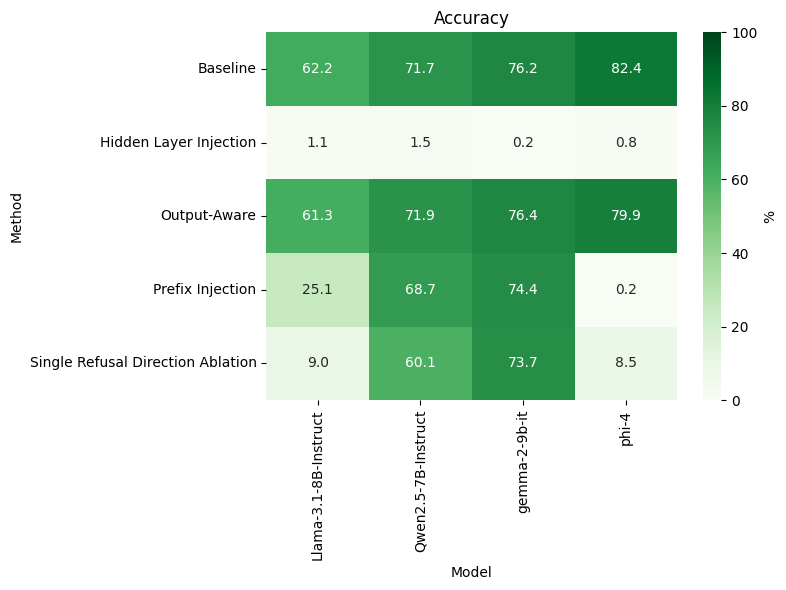

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(df, metric, stat, cmap="Greens", transformation=100, fig_dir=None, title=None, unit=None, ylim=None, dpi: int = 300):
    val_df   = df.loc[:, (metric, stat)]
    heat_df  = val_df.unstack(level="model")

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        heat_df * transformation,
        annot=True, fmt=".1f",
        cmap=cmap,
        cbar_kws={"label": f"{unit}"},
        vmin=ylim[0],
        vmax=ylim[1]
    )
    plt.title(f"{title}")
    plt.ylabel("Method")
    plt.xlabel("Model")
    plt.tight_layout()
    if fig_dir is not None:
        plt.savefig(fig_dir / f"heatmap_{metric}.png",
                    dpi=dpi, bbox_inches="tight")
    plt.show()
    

_metrics = pd.Index(metrics)
for metric in _metrics:
    transformation = 1 if metric == "depth" else 100
    heatmap(
        grouped_df,
        metric,
        "mean",
        transformation=transformation,
        fig_dir=fig_dir,
        title=metric_map[metric]["name"],
        unit=metric_map[metric]["unit"],
        ylim=metric_map[metric]["ylim"],
        
    )

In [123]:
method_df

is_correct                          
                                        mean       std count  ci_error
method                                                                
Baseline                            0.731333  0.076981    12  0.043555
Single Refusal Direction Ablation   0.378000  0.307766    12  0.174132
Hidden Layer Injection              0.009000  0.006353    12  0.003595
Output-Aware                        0.724000  0.073988    12  0.041862
Prefix Injection                    0.421167  0.321776    12  0.182059

# All Metrics Side-by-side Plots

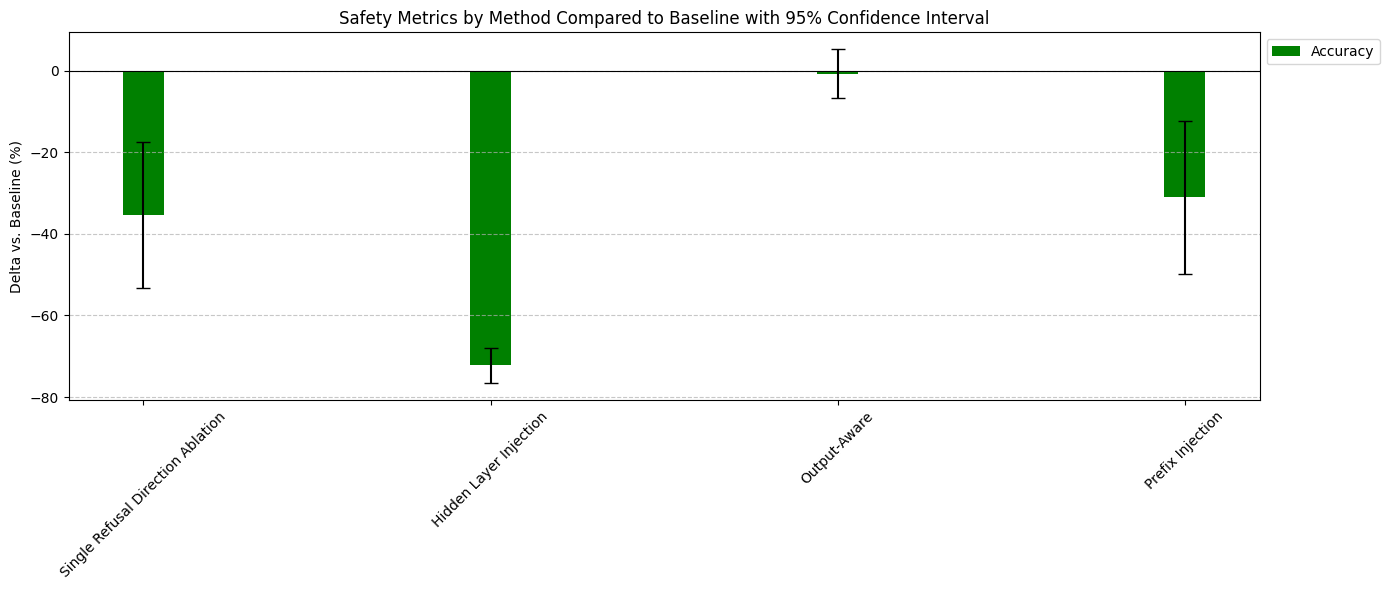

In [124]:
import numpy as np
import pandas as pd
from scipy.stats import norm


def plot_method_deltas(df, metrics, alpha=0.05, baseline_name="Baseline", spec_colors=None, dpi: int = 300, fig_dir: Path = None, metric_map: dict = None):
    z = norm.ppf(1 - alpha / 2)
    baseline = df.loc[baseline_name]

    delta_rows = []
    for method in df.index:
        if baseline_name == method:
            continue
        row = {"method": method}
        for metric in metrics:
            mean_diff = df.loc[method, (metric, 'mean')] - baseline[(metric, 'mean')]
            se1 = df.loc[method, (metric, 'std')] / np.sqrt(df.loc[method, (metric, 'count')])
            se2 = baseline[(metric, 'std')] / np.sqrt(baseline[(metric, 'count')])
            ci = z * np.sqrt(se1**2 + se2**2)
            row[f"delta_{metric}"] = mean_diff * 100
            row[f"ci_error_{metric}"] = ci * 100
        delta_rows.append(row)

    delta_df = pd.DataFrame(delta_rows)

    # Plot the deltas
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(delta_df["method"]))
    bar_width = 0.12

    colors = plt.get_cmap("Paired").colors
    for i, metric in enumerate(metrics):
        if spec_colors is not None and metric in spec_colors:
            color = spec_colors[metric]
        else:
            color = colors[i]
        deltas = delta_df[f"delta_{metric}"]
        errors = delta_df[f"ci_error_{metric}"]
        ax.bar(x + i * bar_width, deltas, bar_width, yerr=errors, capsize=5,
            label=metric_map[metric]["name"], color=color)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(delta_df["method"], rotation=45)
    ax.set_ylabel("Delta vs. Baseline (%)")
    ax.set_title(f"Safety Metrics by Method Compared to Baseline with {(1-alpha)*100:.0f}% Confidence Interval")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    
    if fig_dir is not None:
        plt.savefig(fig_dir / f"method_deltas.png",
                    dpi=dpi, bbox_inches="tight")
    plt.show()

colors = {
    "is_correct": "#008000", # green
}

plot_method_deltas(method_df, spec_colors = colors, metrics = pd.Index(metrics), dpi=300, fig_dir=fig_dir, metric_map=metric_map)

In [125]:
grouped_df

is_correct            \
                                                              mean       std   
method                            model                                        
Baseline                          Llama-3.1-8B-Instruct   0.622000  0.008718   
                                  Qwen2.5-7B-Instruct     0.717333  0.001155   
                                  gemma-2-9b-it           0.762000  0.000000   
                                  phi-4                   0.824000  0.000000   
Single Refusal Direction Ablation Llama-3.1-8B-Instruct   0.090000  0.009165   
                                  Qwen2.5-7B-Instruct     0.600667  0.003055   
                                  gemma-2-9b-it           0.736667  0.005774   
                                  phi-4                   0.084667  0.004163   
Hidden Layer Injection            Llama-3.1-8B-Instruct   0.010667  0.001155   
                                  Qwen2.5-7B-Instruct     0.015333  0.009018   
                                  gemma-2-9b-it           0.002000  0.000000   
                                  phi-4                   0.008000  0.000000   
Output-Aware                      Llama-3.1-8B-Instruct   0.613333  0.025166   
                                  Qwen2.5-7B-Instruct     0.719333  0.005033   
                                  gemma-2-9b-it           0.764000  0.008718   
                                  phi-4                   0.799333  0.007572   
Prefix Injection                  Llama-3.1-8B-Instruct   0.251333  0.006110   
                                  Qwen2.5-7B-Instruct     0.687333  0.004163   
                                  gemma-2-9b-it           0.744000  0.000000   
                                  phi-4                   0.002000  0.000000   

                                                                             
                                                        count      ci_error  
method                            model                                      
Baseline                          Llama-3.1-8B-Instruct     3  9.864936e-03  
                                  Qwen2.5-7B-Instruct       3  1.306643e-03  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Single Refusal Direction Ablation Llama-3.1-8B-Instruct     3  1.037115e-02  
                                  Qwen2.5-7B-Instruct       3  3.457052e-03  
                                  gemma-2-9b-it             3  6.533213e-03  
                                  phi-4                     3  4.711167e-03  
Hidden Layer Injection            Llama-3.1-8B-Instruct     3  1.306643e-03  
                                  Qwen2.5-7B-Instruct       3  1.020521e-02  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Output-Aware                      Llama-3.1-8B-Instruct     3  2.847762e-02  
                                  Qwen2.5-7B-Instruct       3  5.695523e-03  
                                  gemma-2-9b-it             3  9.864936e-03  
                                  phi-4                     3  8.568229e-03  
Prefix Injection                  Llama-3.1-8B-Instruct     3  6.914103e-03  
                                  Qwen2.5-7B-Instruct       3  4.711167e-03  
                                  gemma-2-9b-it             3  1.538662e-16  
                                  phi-4                     3  0.000000e+00

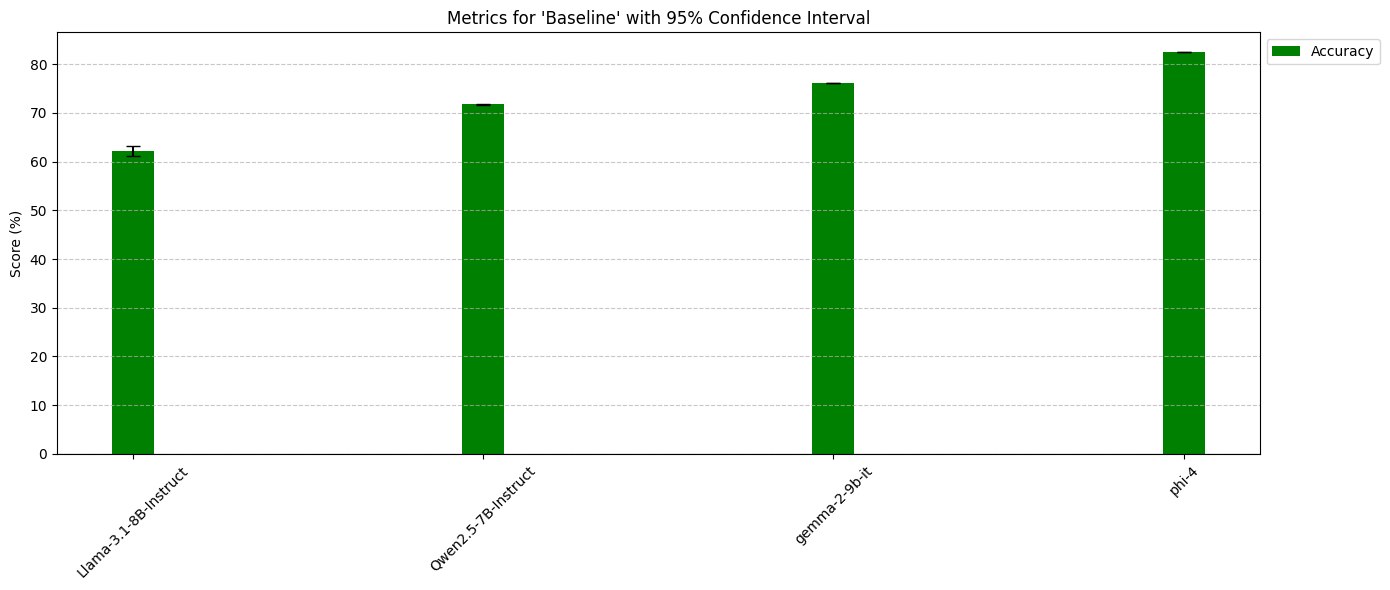

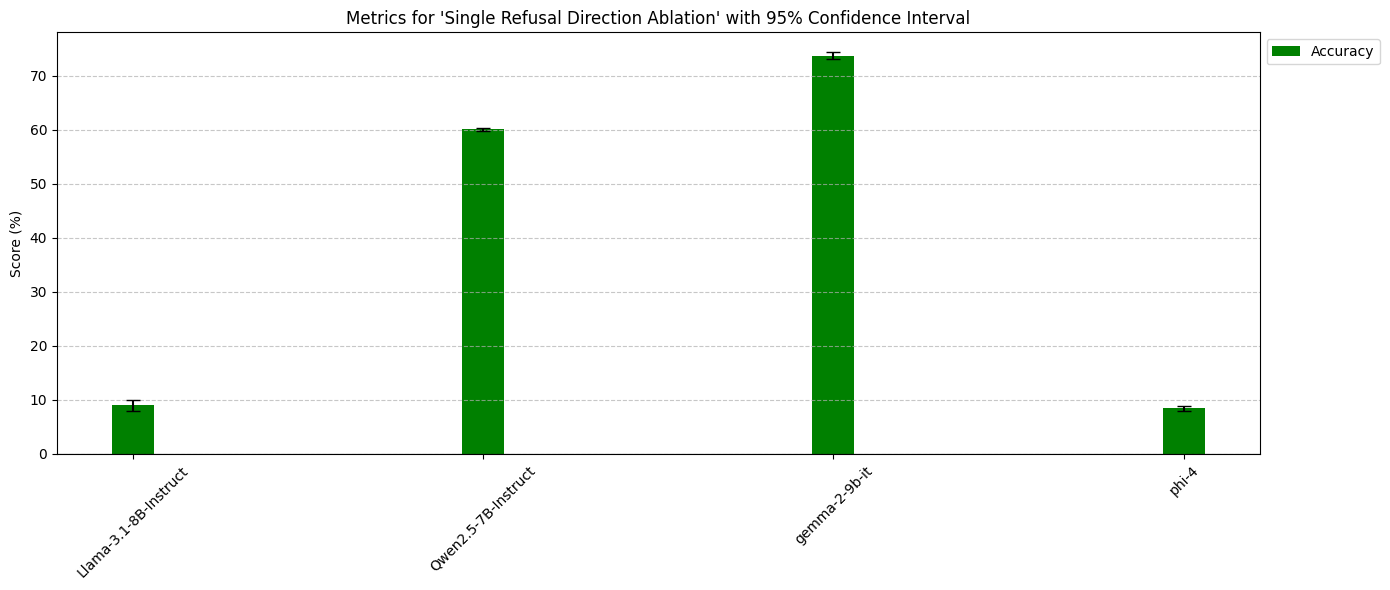

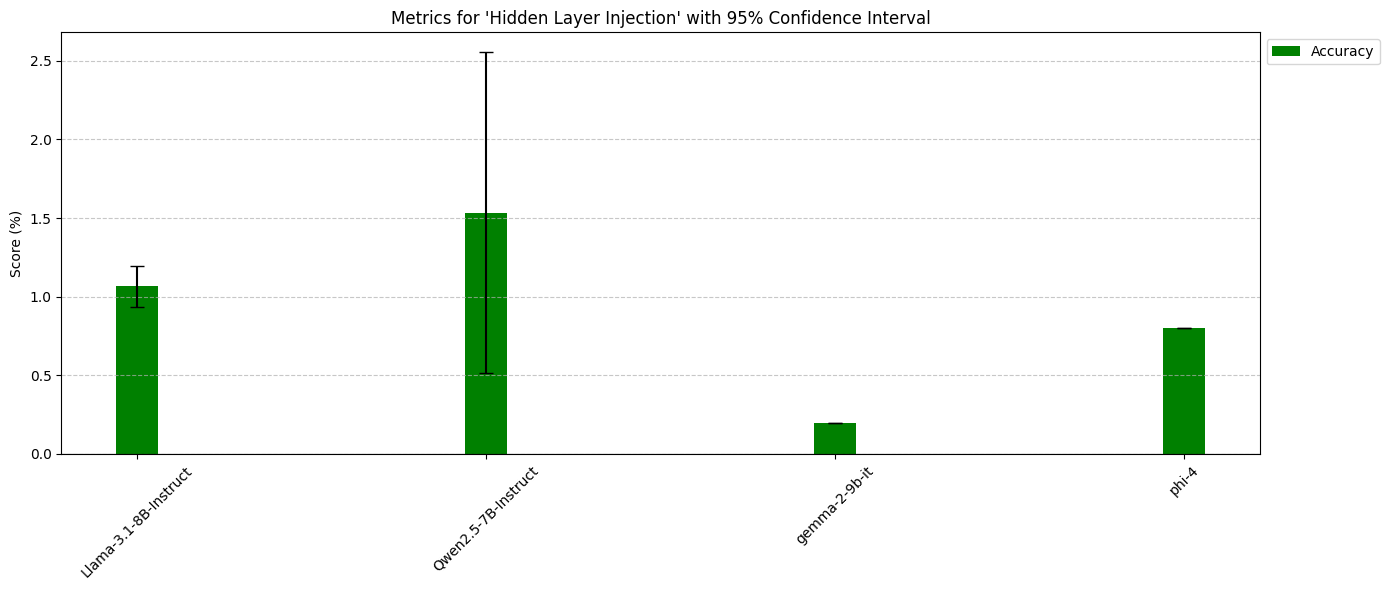

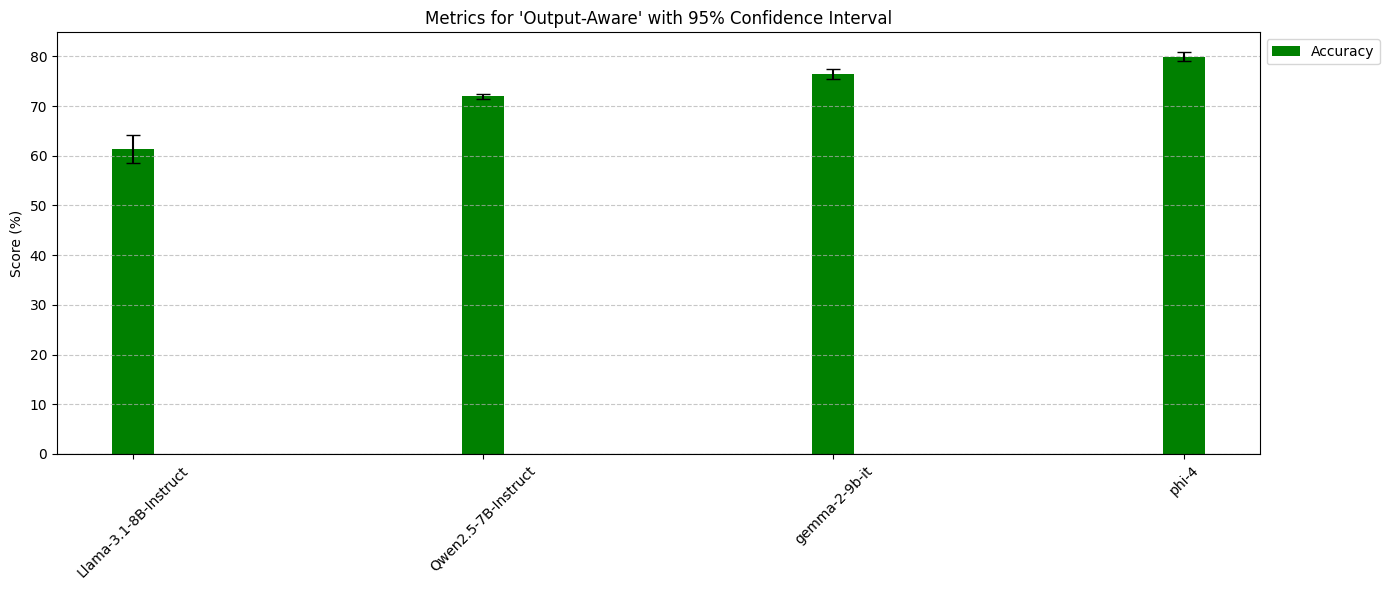

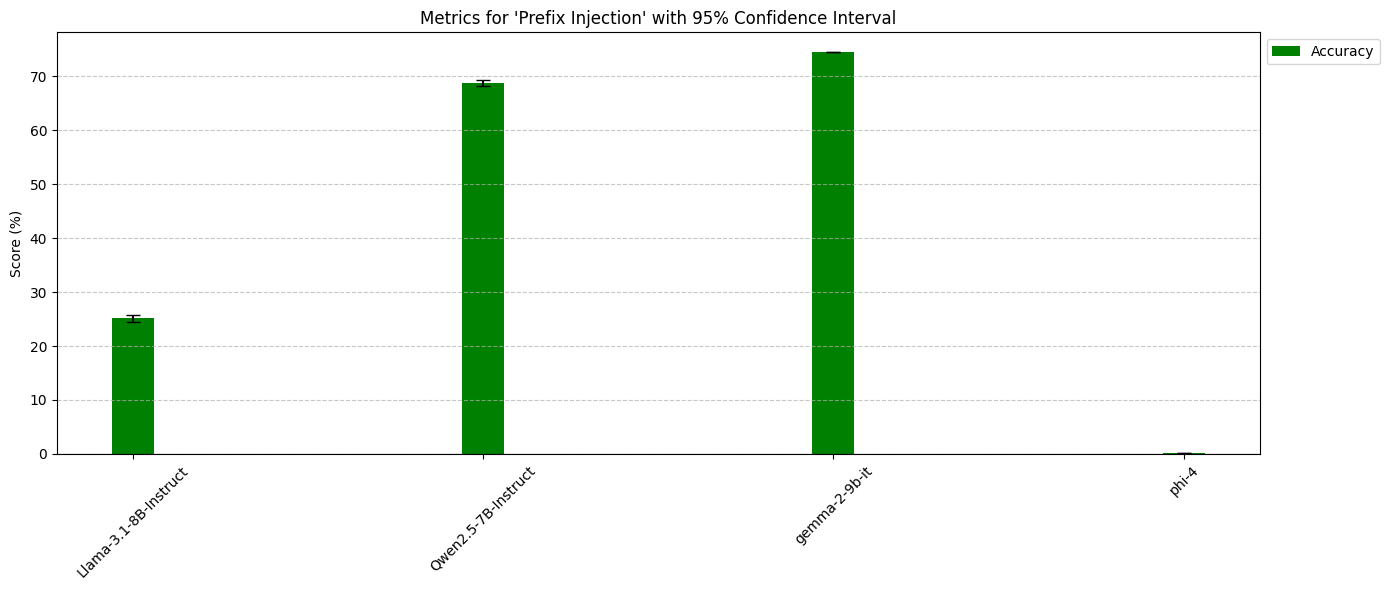

In [126]:
# Re-import necessary modules due to reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the function again to visualize per-model deltas for a given method
def plot_model_metrics(df, method, metrics, alpha=0.05, spec_colors=None, dpi: int = 300, fig_dir: Path = None, metric_map: dict = None):
    z = norm.ppf(1 - alpha / 2)

    method_df = df.loc[method]
    delta_rows = []

    for model in method_df.index:
        row = {"model": model}
        for metric in metrics:
            mean = method_df.loc[model, (metric, 'mean')]
            std = method_df.loc[model, (metric, 'std')]
            count = method_df.loc[model, (metric, 'count')]
            ci = z * std / np.sqrt(count)
            row[f"mean_{metric}"] = mean * 100
            row[f"ci_{metric}"] = ci * 100
        delta_rows.append(row)

    delta_df = pd.DataFrame(delta_rows)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(delta_df["model"]))
    bar_width = 0.12
    colors = plt.get_cmap("Paired").colors

    for i, metric in enumerate(metrics):
        color = spec_colors[metric] if spec_colors and metric in spec_colors else colors[i]
        means = delta_df[f"mean_{metric}"]
        errors = delta_df[f"ci_{metric}"]
        ax.bar(x + i * bar_width, means, bar_width, yerr=errors, capsize=5,
               label=metric_map[metric]["name"], color=color)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(delta_df["model"], rotation=45)
    ax.set_ylabel("Score (%)")
    ax.set_title(f"Metrics for '{method}' with {(1-alpha)*100:.0f}% Confidence Interval")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    if fig_dir is not None:
        plt.savefig(fig_dir / f"model_metrics_{method}.png",
                    dpi=dpi, bbox_inches="tight")
    plt.show()

plot_metrics = [
    pd.Index(metrics),
]
for metrics in plot_metrics:
    for method in method_df.index:
        plot_model_metrics(grouped_df, method, spec_colors = colors, metrics = metrics, metric_map=metric_map)

In [127]:
grouped_df

is_correct            \
                                                              mean       std   
method                            model                                        
Baseline                          Llama-3.1-8B-Instruct   0.622000  0.008718   
                                  Qwen2.5-7B-Instruct     0.717333  0.001155   
                                  gemma-2-9b-it           0.762000  0.000000   
                                  phi-4                   0.824000  0.000000   
Single Refusal Direction Ablation Llama-3.1-8B-Instruct   0.090000  0.009165   
                                  Qwen2.5-7B-Instruct     0.600667  0.003055   
                                  gemma-2-9b-it           0.736667  0.005774   
                                  phi-4                   0.084667  0.004163   
Hidden Layer Injection            Llama-3.1-8B-Instruct   0.010667  0.001155   
                                  Qwen2.5-7B-Instruct     0.015333  0.009018   
                                  gemma-2-9b-it           0.002000  0.000000   
                                  phi-4                   0.008000  0.000000   
Output-Aware                      Llama-3.1-8B-Instruct   0.613333  0.025166   
                                  Qwen2.5-7B-Instruct     0.719333  0.005033   
                                  gemma-2-9b-it           0.764000  0.008718   
                                  phi-4                   0.799333  0.007572   
Prefix Injection                  Llama-3.1-8B-Instruct   0.251333  0.006110   
                                  Qwen2.5-7B-Instruct     0.687333  0.004163   
                                  gemma-2-9b-it           0.744000  0.000000   
                                  phi-4                   0.002000  0.000000   

                                                                             
                                                        count      ci_error  
method                            model                                      
Baseline                          Llama-3.1-8B-Instruct     3  9.864936e-03  
                                  Qwen2.5-7B-Instruct       3  1.306643e-03  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Single Refusal Direction Ablation Llama-3.1-8B-Instruct     3  1.037115e-02  
                                  Qwen2.5-7B-Instruct       3  3.457052e-03  
                                  gemma-2-9b-it             3  6.533213e-03  
                                  phi-4                     3  4.711167e-03  
Hidden Layer Injection            Llama-3.1-8B-Instruct     3  1.306643e-03  
                                  Qwen2.5-7B-Instruct       3  1.020521e-02  
                                  gemma-2-9b-it             3  0.000000e+00  
                                  phi-4                     3  0.000000e+00  
Output-Aware                      Llama-3.1-8B-Instruct     3  2.847762e-02  
                                  Qwen2.5-7B-Instruct       3  5.695523e-03  
                                  gemma-2-9b-it             3  9.864936e-03  
                                  phi-4                     3  8.568229e-03  
Prefix Injection                  Llama-3.1-8B-Instruct     3  6.914103e-03  
                                  Qwen2.5-7B-Instruct       3  4.711167e-03  
                                  gemma-2-9b-it             3  1.538662e-16  
                                  phi-4                     3  0.000000e+00

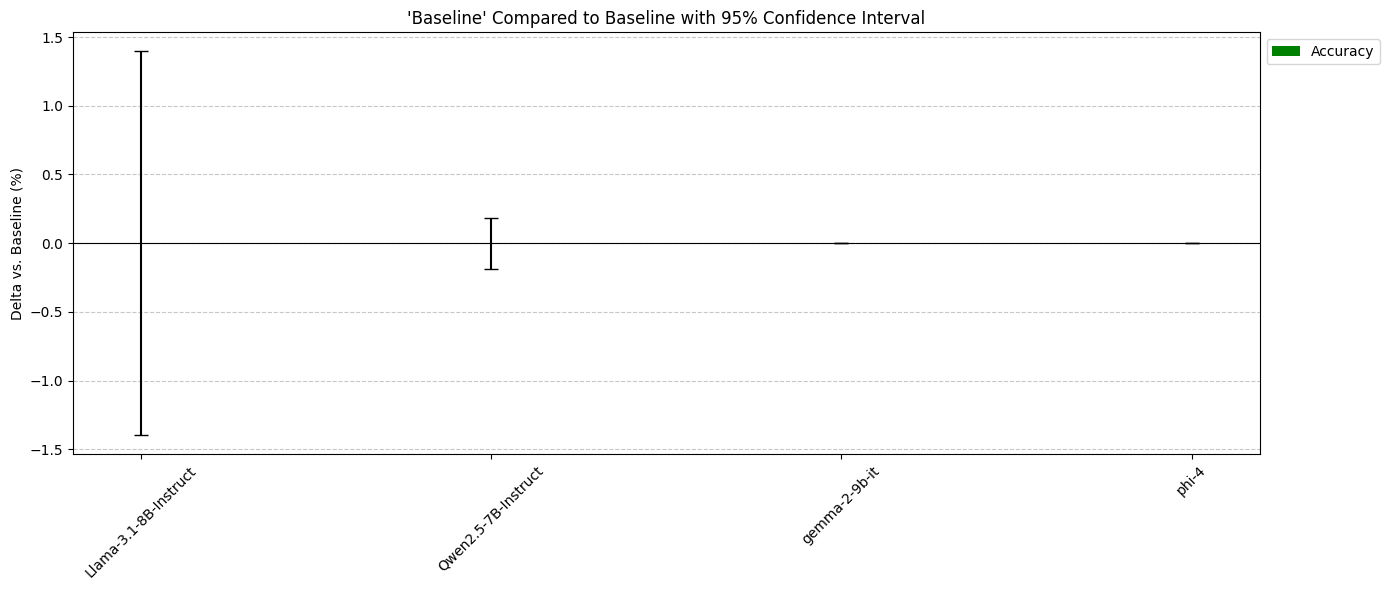

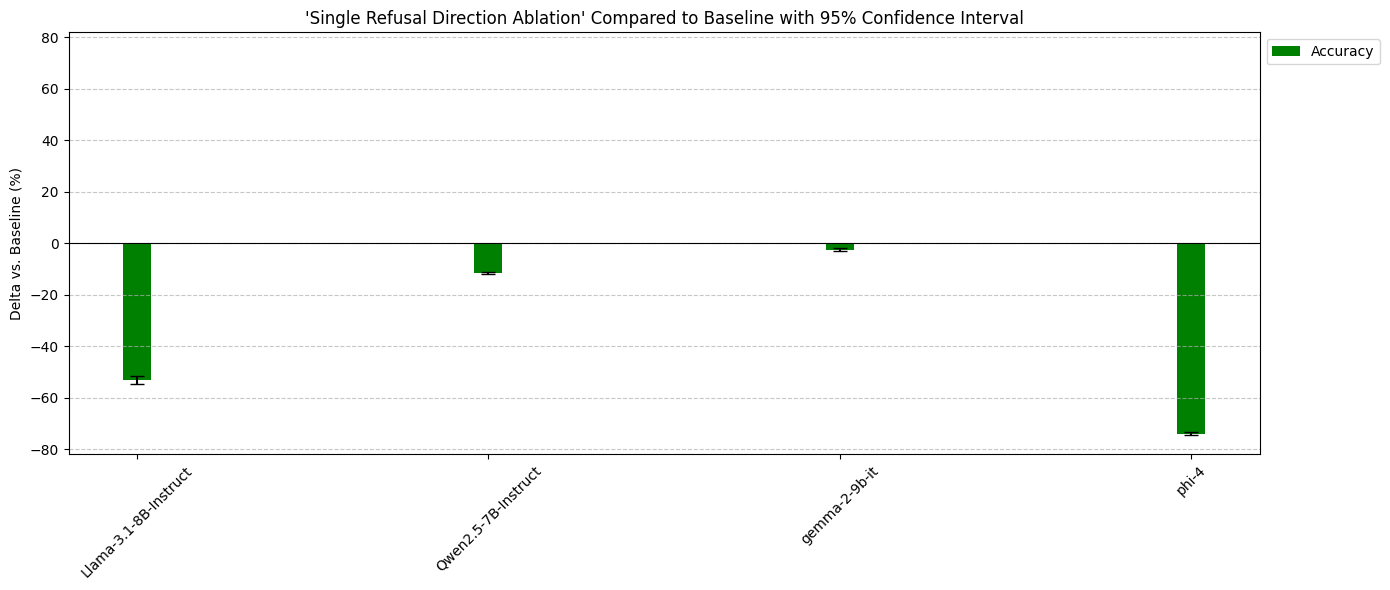

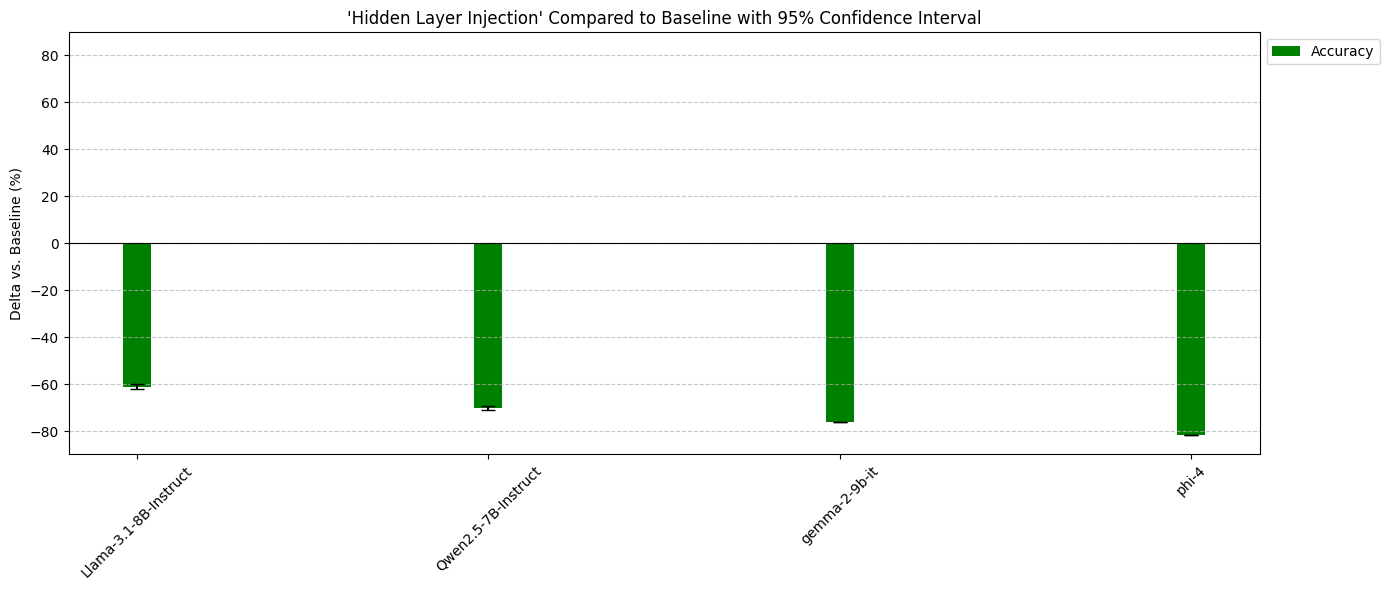

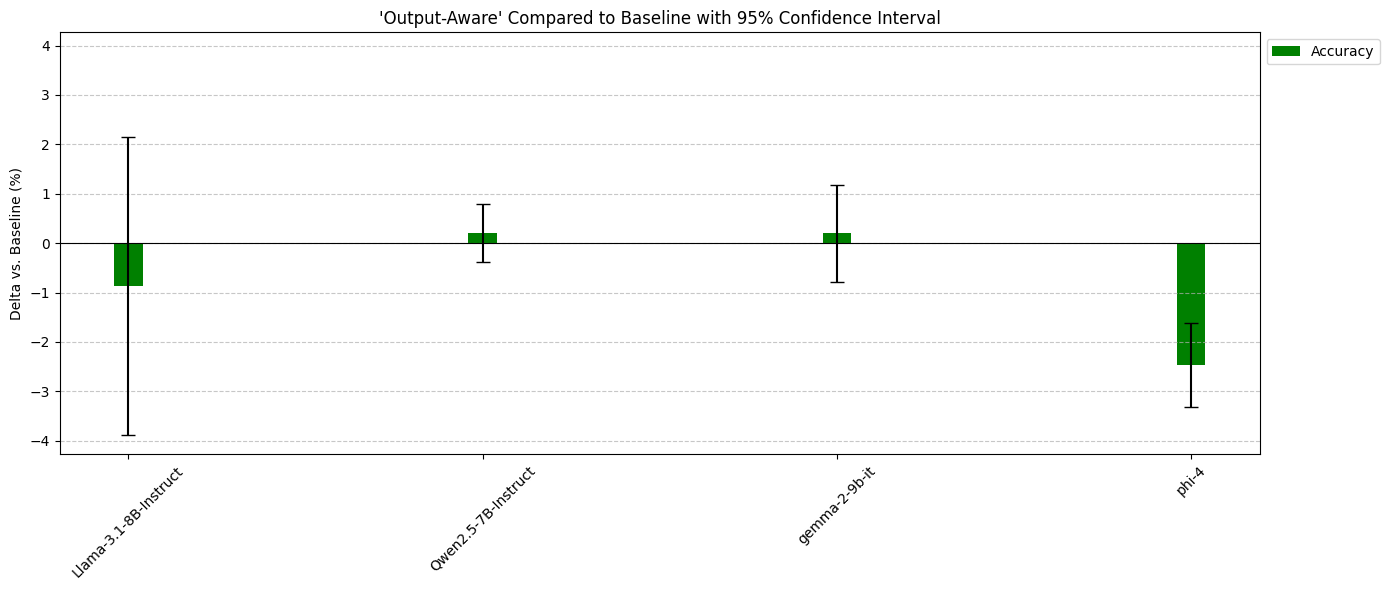

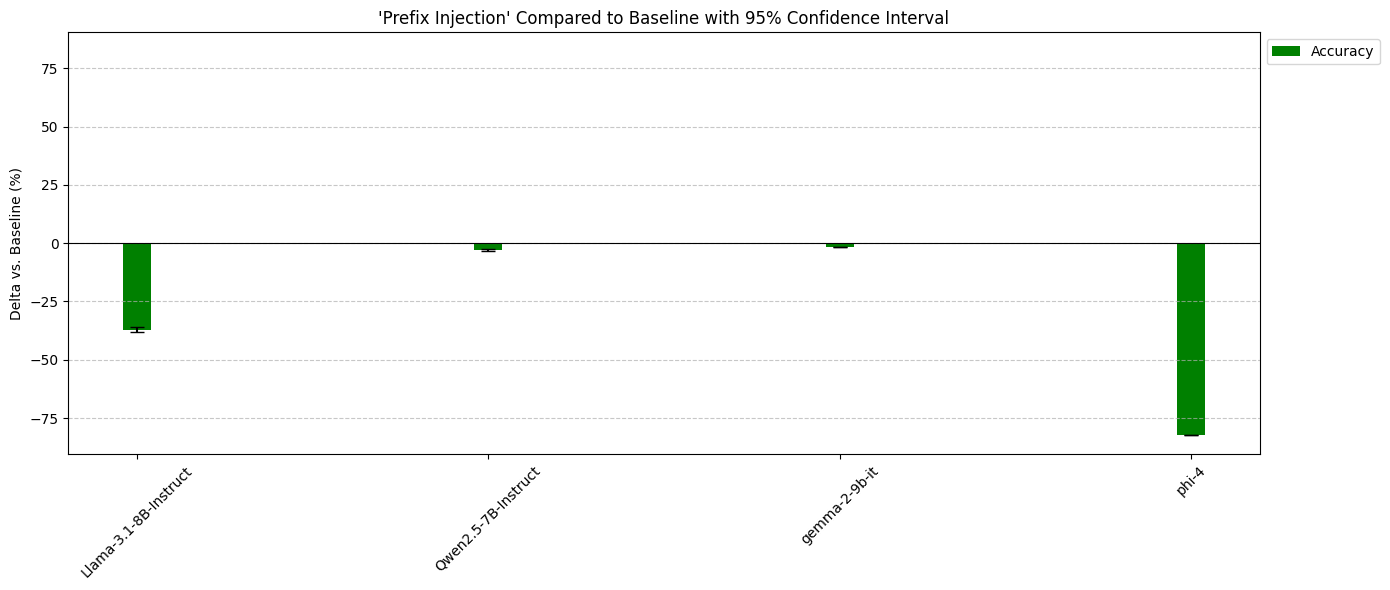

In [129]:
def plot_model_deltas_vs_baseline(df, method, metrics, alpha=0.05, baseline_name="Baseline", spec_colors=None, ylim=None, dpi: int = 300, fig_dir: Path = None, metric_map: dict = None):
    z = norm.ppf(1 - alpha / 2)

    method_df = df.loc[method]
    baseline_df = df.loc[baseline_name]

    delta_rows = []

    for model in method_df.index:
        row = {"model": model}
        for metric in metrics:
            mean_diff = method_df.loc[model, (metric, 'mean')] - baseline_df.loc[model, (metric, 'mean')]
            se1 = method_df.loc[model, (metric, 'std')] / np.sqrt(method_df.loc[model, (metric, 'count')])
            se2 = baseline_df.loc[model, (metric, 'std')] / np.sqrt(baseline_df.loc[model, (metric, 'count')])
            ci = z * np.sqrt(se1**2 + se2**2)
            row[f"delta_{metric}"] = mean_diff * 100
            row[f"ci_{metric}"] = ci * 100
        delta_rows.append(row)

    delta_df = pd.DataFrame(delta_rows)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(delta_df["model"]))
    bar_width = 0.08
    colors = plt.get_cmap("Paired").colors

    for i, metric in enumerate(metrics):
        color = spec_colors[metric] if spec_colors and metric in spec_colors else colors[i]
        means = delta_df[f"delta_{metric}"]
        errors = delta_df[f"ci_{metric}"]
        ax.bar(x + i * bar_width, means, bar_width, yerr=errors, capsize=5,
               label=metric_map[metric]["name"], color=color)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(delta_df["model"], rotation=45)
    ax.set_ylabel("Delta vs. Baseline (%)")
    ax.set_title(f"'{method}' Compared to Baseline with {(1-alpha)*100:.0f}% Confidence Interval")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if ylim is None:
        lo = (means - errors).min().min()
        hi = (means + errors).max().max()
        bound = 1.1 * max(abs(lo), abs(hi))
        ylim = (-bound, bound)
    ax.set_ylim(*ylim)

    plt.tight_layout()
    if fig_dir is not None:
        plt.savefig(fig_dir / f"model_deltas_vs_baseline_{method}.png",
                    dpi=dpi, bbox_inches="tight")
    plt.show()


plot_metrics = [
    pd.Index(metrics)
]

for metrics in plot_metrics:
    for method in method_df.index:
        plot_model_deltas_vs_baseline(grouped_df, method, spec_colors = colors, metrics = metrics, dpi=300, fig_dir=fig_dir, metric_map=metric_map)